In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.3 MB/s eta 0:00:00


In [2]:
!mkdir -p /content/dataset
!unzip -q "road damage det.v4i.yolov8.zip" -d /content/dataset


unzip:  cannot find or open road damage det.v4i.yolov8.zip, road damage det.v4i.yolov8.zip.zip or road damage det.v4i.yolov8.zip.ZIP.


In [3]:
!unzip -q "/content/drive/MyDrive/road damage det.v4i.yolov8.zip" -d /content/dataset



In [4]:
import os
print(os.path.exists("/content/dataset/data.yaml"))


True


In [7]:
from ultralytics import YOLO

model55 = YOLO("yolo11s.pt")
model55.train(
    data="/content/dataset/data.yaml",
    epochs=55,
    imgsz=512,
    batch=16,
    device=0,
    name="epochs_55e"
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=55, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=epochs_55e, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb1a2373ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     


image 1/1 /content/dataset/train/images/003thumb_jpg.rf.f6aab192cb101e309adb83a33787177a.jpg: 512x512 1 alligator cracking, 3 patchings, 12.4ms
Speed: 3.1ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

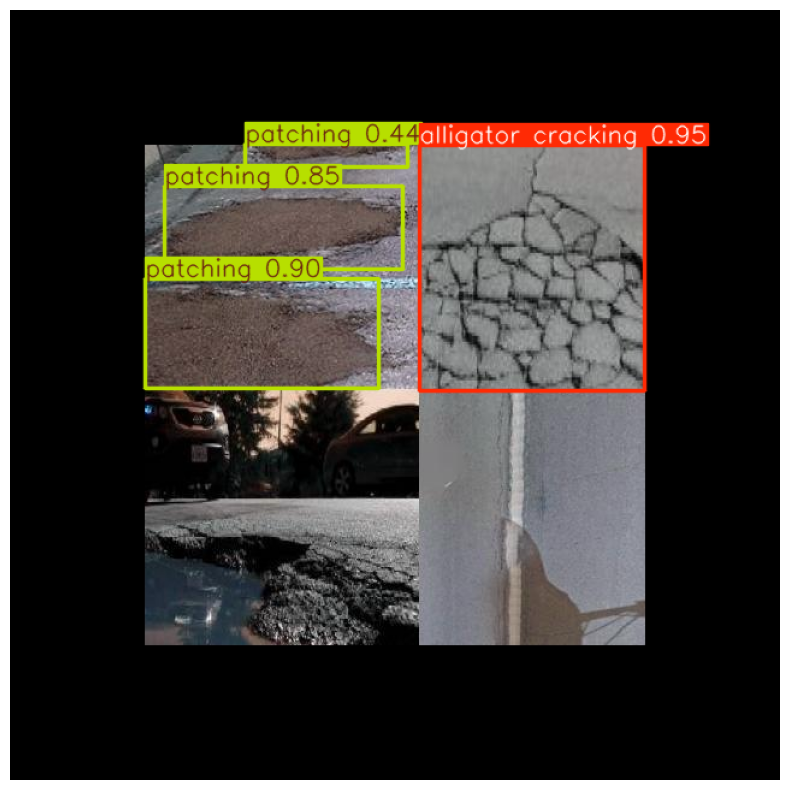

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/epochs_55e/weights/best.pt")

img_path = "/content/dataset/train/images/003thumb_jpg.rf.f6aab192cb101e309adb83a33787177a.jpg"   # <-- replace with filename
results = model(img_path)

plt.figure(figsize=(10,10))
plt.imshow(results[0].plot())
plt.axis('off')


In [10]:
/content/runs/detect/s55_infer/


NameError: name 'content' is not defined

In [11]:
model = YOLO("/content/runs/detect/epochs_55e/weights/best.pt")
model.predict(
    source="/content/dataset/test/images",
    imgsz=512,
    conf=0.25,
    save=True,
    project="/content/runs/detect",
    name="s55_infer"
)



image 1/391 /content/dataset/test/images/12_jpg.rf.581e3d2ede69811df50b557ab6379824.jpg: 512x512 2 alligator crackings, 1 edge cracking, 1 longitudinal cracking, 11.2ms
image 2/391 /content/dataset/test/images/17_jpg.rf.4d81ebeb51289dc3c80ac75c10a5ac7f.jpg: 512x512 1 rutting, 11.2ms
image 3/391 /content/dataset/test/images/24_jpg.rf.8a9354886e96191f4ba275a88f34dc7a.jpg: 512x512 (no detections), 11.1ms
image 4/391 /content/dataset/test/images/32_jpg.rf.90bf6d696934891c9b6fbc8f1abd9d10.jpg: 512x512 1 alligator cracking, 11.2ms
image 5/391 /content/dataset/test/images/35_jpg.rf.134c6a98fc80853f9c0593ea177c4288.jpg: 512x512 2 transverse crackings, 11.1ms
image 6/391 /content/dataset/test/images/36_jpg.rf.97d59aefcc811d1c53cbcf9822d982bb.jpg: 512x512 2 alligator crackings, 13.1ms
image 7/391 /content/dataset/test/images/36_jpg.rf.a70879c898a50b594deb6a9738c7beb4.jpg: 512x512 1 alligator cracking, 11.6ms
image 8/391 /content/dataset/test/images/39_jpg.rf.92073b1ba9b9d72834106a543710e044.jpg

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'alligator cracking', 1: 'edge cracking', 2: 'longitudinal cracking', 3: 'patching', 4: 'rutting', 5: 'transverse cracking'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
  

In [12]:
from google.colab import files
files.download('/content/runs/detect/epochs_55e/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
!zip -r s55_infer.zip /content/runs/detect/s55_infer
files.download('s55_infer.zip')


  adding: content/runs/detect/s55_infer/ (stored 0%)
  adding: content/runs/detect/s55_infer/gsv_173_jpg.rf.e865ee32b34e482b0cbfdf8de9ba42f1.jpg (deflated 9%)
  adding: content/runs/detect/s55_infer/cracking2-66-_jpg.rf.cdb33e41874365e6df54ec5d421afd85.jpg (deflated 10%)
  adding: content/runs/detect/s55_infer/csm_ChipFill_18-months_after_application_ffa5e8c278_jpg.rf.c94ba3d573ee2869144592a7bc8eb92e.jpg (deflated 8%)
  adding: content/runs/detect/s55_infer/img-104_jpg.rf.2295898965a56df9fd1c9dd21c52c087.jpg (deflated 9%)
  adding: content/runs/detect/s55_infer/us14-222-_jpg.rf.c19d56ea04ba26981cee5cce7804c628.jpg (deflated 10%)
  adding: content/runs/detect/s55_infer/c_im102_2_2_jpg.rf.879379bca4d629b7d6aa117d2474710c.jpg (deflated 9%)
  adding: content/runs/detect/s55_infer/c_imIMG_7400_0_1_jpg.rf.497c059b090e0493535722054f1e3ac9.jpg (deflated 8%)
  adding: content/runs/detect/s55_infer/c_imIMG_7400_0_0_jpg.rf.4bb1c922167706f5e3b62915221a83ff.jpg (deflated 8%)
  adding: content/runs/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!cp -r /content/runs/detect/epochs_55e /content/drive/MyDrive/
!cp -r /content/runs/detect/s55_infer /content/drive/MyDrive/
